In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms, utils

In [2]:
im_transforms = {"train": transforms.Compose([transforms.Resize((224, 224)),transforms.ToTensor()]),"test": transforms.Compose([transforms.Resize((224, 224)),transforms.ToTensor()])}
train_set = datasets.ImageFolder("data/data_1",transform = im_transforms["train"]
)
val_set   = datasets.ImageFolder("data/data_1",transform = im_transforms["test"])
  
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32,
                                       shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=32,  
                                       shuffle=True, num_workers=2)
classes = train_set.classes
device = torch.device("cuda:0" if torch.cuda.is_available()
                               else "cpu")

#train_loader.class_to_idx


In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.block1 = self.conv_block(c_in=3, c_out=256, dropout=0.1, kernel_size=5, stride=1, padding=2)
        self.block2 = self.conv_block(c_in=256, c_out=128, dropout=0.1, kernel_size=3, stride=1, padding=1)
        self.block3 = self.conv_block(c_in=128, c_out=64, dropout=0.1, kernel_size=3, stride=1, padding=1)
        self.lastcnn = nn.Conv2d(in_channels=64, out_channels=2, kernel_size=56, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
    def forward(self, x):
        x = self.block1(x)
        x = self.maxpool(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.maxpool(x)
        x = self.lastcnn(x)
        return x
    def conv_block(self, c_in, c_out, dropout,  **kwargs):
        seq_block = nn.Sequential(
            nn.Conv2d(in_channels=c_in, out_channels=c_out, **kwargs),
            nn.BatchNorm2d(num_features=c_out),
            nn.ReLU(),
            nn.Dropout2d(p=dropout)
        )
        return seq_block
    
net = Net()
print(net)

Net(
  (block1): Sequential(
    (0): Conv2d(3, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.1)
  )
  (block2): Sequential(
    (0): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.1)
  )
  (block3): Sequential(
    (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout2d(p=0.1)
  )
  (lastcnn): Conv2d(64, 2, kernel_size=(56, 56), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [4]:
model2 = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model2(inputs).squeeze()
        #print(outputs, inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        #print("check1")
        optimizer.step()
        
        running_loss += loss.item()
        print("running_loss :",running_loss)
        print("check2")
    print("Epoch:", epoch, "Loss: ", running_loss)
print('Finished Training')

running_loss : 0.7015650272369385
check2
running_loss : 2.201869487762451
check2
running_loss : 10.523746967315674
check2
running_loss : 13.695887804031372
check2
running_loss : 17.96301531791687
check2
running_loss : 20.93326473236084
check2
running_loss : 27.208945751190186
check2
running_loss : 29.089460134506226
check2
running_loss : 31.426860809326172
check2
running_loss : 39.6180944442749
check2
running_loss : 46.24417686462402
check2
running_loss : 47.61167097091675
check2
running_loss : 50.951106548309326
check2
running_loss : 52.726086497306824
check2
running_loss : 54.379862546920776
check2
running_loss : 57.27984857559204
check2
running_loss : 58.222357988357544
check2
running_loss : 61.505563497543335
check2
running_loss : 63.46799039840698
check2
running_loss : 65.92426228523254
check2
running_loss : 67.66820669174194
check2
running_loss : 68.57520258426666
check2
running_loss : 70.12822580337524
check2
running_loss : 71.58809721469879
check2
running_loss : 73.062804937362

In [15]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            print(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs).squeeze()
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(2):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

tensor([1, 0, 0, 1, 1, 0, 1, 1, 1, 0])
tensor([0, 1, 1, 0, 0, 0, 0])
Accuracy of Not_success : 100 %
Accuracy of Success : 100 %


In [10]:
PATH = '.binary_net2.pth'
torch.save(model2.state_dict(), PATH)

In [13]:
model = Net()
model.load_state_dict(torch.load('.binary_net2.pth'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [6]:
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            #print(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model2(inputs).squeeze()
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(2):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

tensor([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 1])
tensor([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1])
tensor([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 1])
tensor([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0])
tensor([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 0])
tensor([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1])
tensor([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 1])
tensor([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 0,

  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

data/test_new\no1232.JPG


  4%|██▉                                                                                | 1/28 [00:00<00:26,  1.00it/s]

[ 6.1351147 -6.2946177]
data/test_new\no1234.JPG


  7%|█████▉                                                                             | 2/28 [00:02<00:28,  1.09s/it]

[ 10.643786 -10.165398]
data/test_new\no243.JPG


 11%|████████▉                                                                          | 3/28 [00:03<00:26,  1.07s/it]

[ 5.1221943 -4.9551387]
data/test_new\no3.JPG


 14%|███████████▊                                                                       | 4/28 [00:04<00:25,  1.06s/it]

[ 5.652767 -5.610038]
data/test_new\no321.JPG


 18%|██████████████▊                                                                    | 5/28 [00:05<00:24,  1.05s/it]

[ 5.795039  -5.5718617]
data/test_new\no3213.JPG


 21%|█████████████████▊                                                                 | 6/28 [00:06<00:23,  1.06s/it]

[ 4.277792 -4.3147  ]
data/test_new\no345.JPG


 25%|████████████████████▊                                                              | 7/28 [00:07<00:22,  1.07s/it]

[ 12.587589 -12.247595]
data/test_new\no3452.JPG


 29%|███████████████████████▋                                                           | 8/28 [00:08<00:23,  1.20s/it]

[ 6.754351  -6.1291084]
data/test_new\no4.JPG


 32%|██████████████████████████▋                                                        | 9/28 [00:10<00:23,  1.21s/it]

[ 7.60394  -7.420971]
data/test_new\no678.JPG


 36%|█████████████████████████████▎                                                    | 10/28 [00:11<00:21,  1.19s/it]

[ 5.809553 -5.561339]
data/test_new\no789.JPG


 39%|████████████████████████████████▏                                                 | 11/28 [00:12<00:19,  1.14s/it]

[ 3.5851104 -3.537388 ]
data/test_new\noj.JPG


 43%|███████████████████████████████████▏                                              | 12/28 [00:13<00:17,  1.11s/it]

[ 3.8972495 -3.6594594]
data/test_new\no_3.JPG


 46%|██████████████████████████████████████                                            | 13/28 [00:14<00:16,  1.09s/it]

[ 0.7492014 -0.5771335]
data/test_new\yes1234.JPG


 50%|█████████████████████████████████████████                                         | 14/28 [00:15<00:14,  1.07s/it]

[-5.3765526  5.1440954]
data/test_new\yes3214.JPG


 54%|███████████████████████████████████████████▉                                      | 15/28 [00:16<00:14,  1.12s/it]

[-3.6924107  4.141794 ]
data/test_new\yes3246.JPG


 57%|██████████████████████████████████████████████▊                                   | 16/28 [00:17<00:14,  1.18s/it]

[-4.5308332  5.146616 ]
data/test_new\yes4357.JPG


 61%|█████████████████████████████████████████████████▊                                | 17/28 [00:19<00:13,  1.21s/it]

[ 0.34123123 -0.3555552 ]
data/test_new\yes5431.JPG


 64%|████████████████████████████████████████████████████▋                             | 18/28 [00:20<00:11,  1.15s/it]

[-2.348156   2.5530586]
data/test_new\yes5432.JPG


 68%|███████████████████████████████████████████████████████▋                          | 19/28 [00:21<00:10,  1.12s/it]

[ 6.408948 -5.99465 ]
data/test_new\yes568.JPG


 71%|██████████████████████████████████████████████████████████▌                       | 20/28 [00:22<00:08,  1.11s/it]

[ 1.7559248 -2.003589 ]
data/test_new\yes6542.JPG


C:\Users\prabh\miniconda3\envs\proj1\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|█████████████████████████████████████████████████████████████▌                    | 21/28 [00:23<00:07,  1.09s/it]

[-4.175022  4.467654]
data/test_new\yes678.JPG


 79%|████████████████████████████████████████████████████████████████▍                 | 22/28 [00:24<00:06,  1.07s/it]

[-4.3538356  4.604705 ]
data/test_new\yes7.JPG


 82%|███████████████████████████████████████████████████████████████████▎              | 23/28 [00:25<00:05,  1.07s/it]

[-4.499194   4.6624727]
data/test_new\yes765.JPG


 86%|██████████████████████████████████████████████████████████████████████▎           | 24/28 [00:26<00:04,  1.07s/it]

[-2.8565934  2.4824378]
data/test_new\yes789.JPG


 89%|█████████████████████████████████████████████████████████████████████████▏        | 25/28 [00:27<00:03,  1.06s/it]

[-4.7059937  4.924696 ]
data/test_new\yes89.JPG


 93%|████████████████████████████████████████████████████████████████████████████▏     | 26/28 [00:28<00:02,  1.05s/it]

[-4.0772805  4.3003864]
data/test_new\yes890.JPG


 96%|███████████████████████████████████████████████████████████████████████████████   | 27/28 [00:29<00:01,  1.05s/it]

[-1.1957245  1.6272702]
data/test_new\yes9.JPG


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:30<00:00,  1.10s/it]

[-6.4107723  6.4800262]
No count 16
Yes count 12


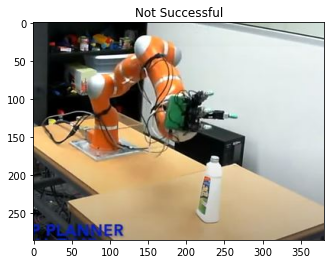

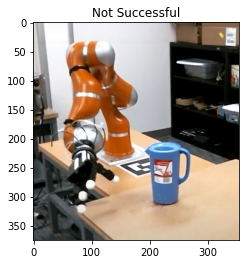

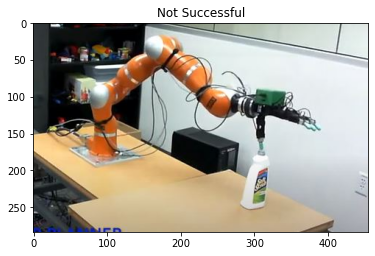

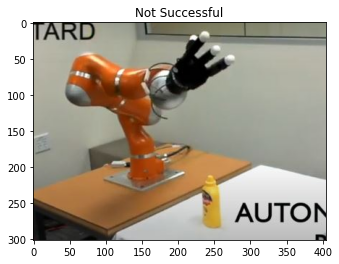

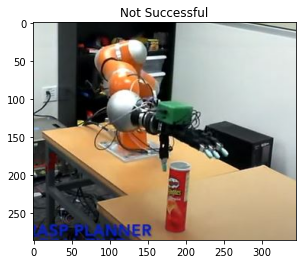

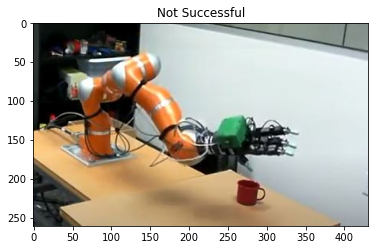

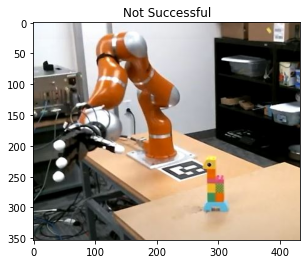

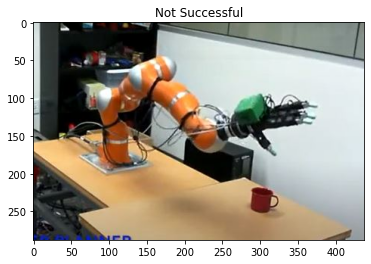

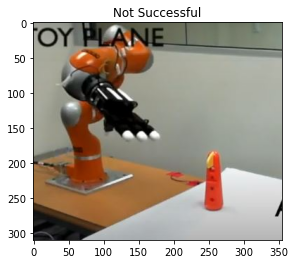

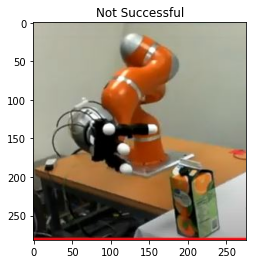

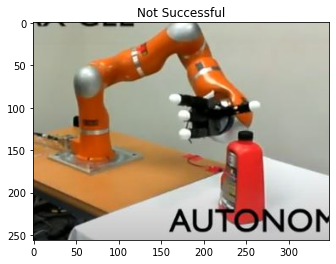

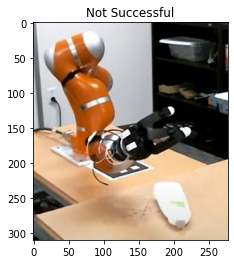

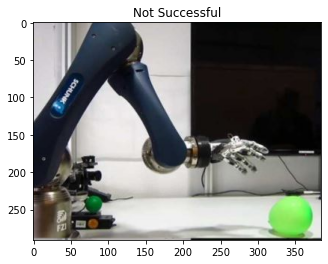

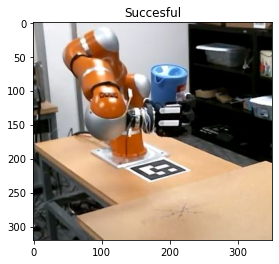

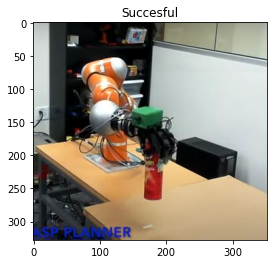

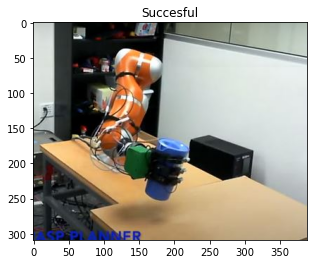

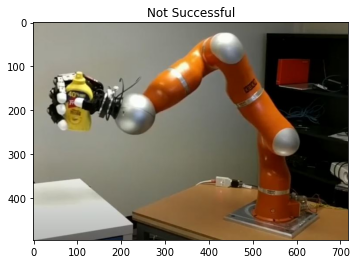

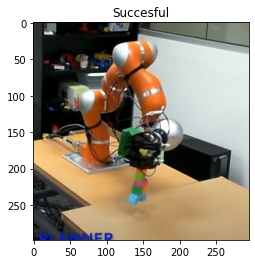

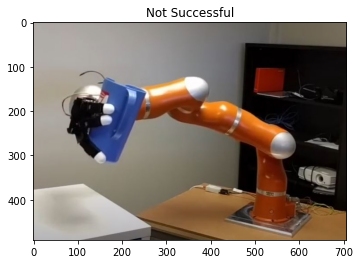

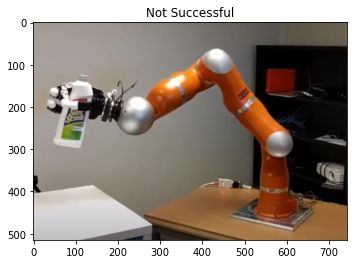

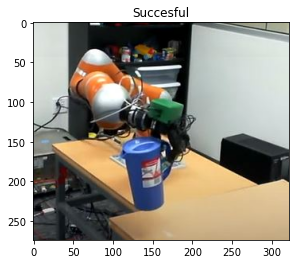

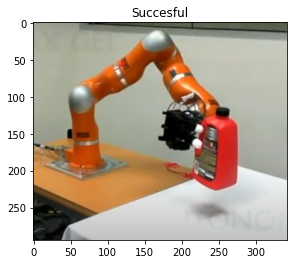

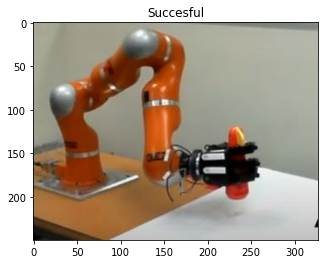

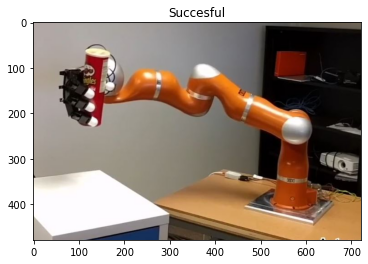

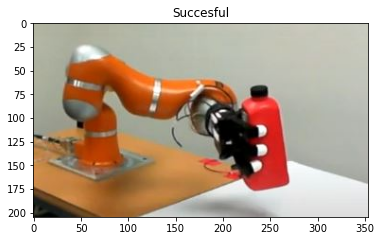

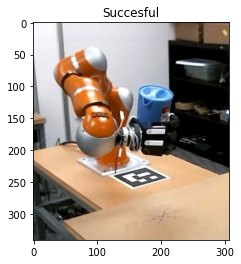

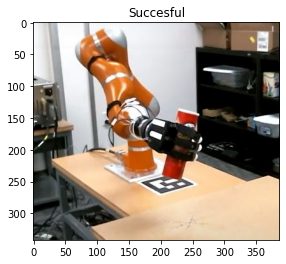

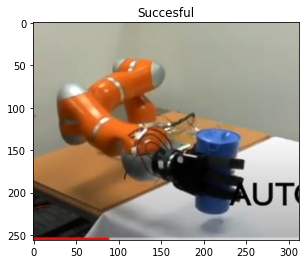

In [14]:
from PIL import Image
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import os
#model.eval()
#img_name = "data/test_/yes (4).jpg" # change this to the name of your image file.
def predict(image_path, model):
    n_count = 0
    y_count = 0
    image = Image.open(image_path)
    image_tensor = im_transforms["test"](image)
    image_tensor = image_tensor.unsqueeze(0)
    image_tensor = image_tensor.to(device)
    output = model(image_tensor)
    index = output.argmax().item()
    plt.figure()
    if index == 0:
        str_label='Not Successful'
        print((torch.squeeze(output)).detach().numpy())
        plt.title(str_label)
        n_count = n_count +1
        
    else:
        str_label='Succesful'
        print((torch.squeeze(output)).detach().numpy())
        plt.title(str_label)
        y_count = y_count +1
        
    smooth_img = cv2.imread(image_path)
    smooth_img = cv2.cvtColor(smooth_img, cv2.COLOR_BGR2RGB)
    #print(len(training_data))
    
    plt.imshow(smooth_img.astype(np.uint8))
    
    return str_label, n_count, y_count
#predict(img_name,model)
folder = "data/test_new"
no_count = []
yes_count = []
for img in tqdm(os.listdir(folder)):
    path = os.path.join(folder,img)
    print(path)
    smooth_img = cv2.imread(path)
    #print(len(training_data))
    prediction,  n_count,  y_count= predict(path,model)
    if n_count == 1:
        no_count.append(1)
    else:
        yes_count.append(1)
            
        
    #plt.figure()
    #plt.title(prediction, out.detach().numpy())
    #plt.imshow(smooth_img.astype(np.uint8))
    
print("No count",len(no_count))
print("Yes count",len(yes_count))

In [2]:
16*(1/41.16) - (0.588/41.16)

0.37444120505344997